In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv('fileinbound2tcp.csv')
df 

,category,timestamp,n_pkts,n_bits,n_drops,n_syn_pkts,n_ack_pkts,n_psh_pkts,n_rst_pkts,n_fin_pkts,n_ece_pkts,n_urg_pkts,n_cwr_pkts,n_tcp_payload_misbehaviour_drops,n_tcp_payload_misbehaviour_timeouts,n_out_of_order_drops,n_ssl_renegotiation_requests
0,InboundTCPMetrics,1685404871000,3,9920,0,4,3,1,2,0,0,0,0,0,0,0,0
1,InboundTCPMetrics,1685404871000,3,9920,0,4,3,1,2,0,0,0,0,0,0,0,0
2,InboundTCPMetrics,1685404871000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,InboundTCPMetrics,1685404881000,3,3768,0,4,2,1,2,0,0,0,0,0,0,0,0
4,InboundTCPMetrics,1685404881000,3,3768,0,4,2,1,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24941,InboundTCPMetrics,1685491245000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24942,InboundTCPMetrics,1685491255000,4,7040,0,2,4,1,1,2,0,0,0,0,0,0,0
24943,InboundTCPMetrics,1685491255000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24944,InboundTCPMetrics,1685491255000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
filtered_df = df[df['n_bits'] != 0]

filtered_df.shape

(11549, 17)

In [4]:
columns=['n_drops']
df1=filtered_df.drop(columns,axis=1)

In [5]:
df1.head()

,category,timestamp,n_pkts,n_bits,n_syn_pkts,n_ack_pkts,n_psh_pkts,n_rst_pkts,n_fin_pkts,n_ece_pkts,n_urg_pkts,n_cwr_pkts,n_tcp_payload_misbehaviour_drops,n_tcp_payload_misbehaviour_timeouts,n_out_of_order_drops,n_ssl_renegotiation_requests
0,InboundTCPMetrics,1685404871000,3,9920,4,3,1,2,0,0,0,0,0,0,0,0
1,InboundTCPMetrics,1685404871000,3,9920,4,3,1,2,0,0,0,0,0,0,0,0
3,InboundTCPMetrics,1685404881000,3,3768,4,2,1,2,0,0,0,0,0,0,0,0
4,InboundTCPMetrics,1685404881000,3,3768,4,2,1,2,0,0,0,0,0,0,0,0
6,InboundTCPMetrics,1685404891000,7,54824,2,6,1,1,1,0,0,0,0,0,0,0


In [6]:
model = IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.3),max_features=1.0)
model.fit(df1[['n_bits']])

/home/haltdos/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.3)

In [7]:
df1['anamoly_scores']= model.decision_function(df1[['n_bits']])
df1['anamoly']= model.predict(df1[['n_bits']])
df1.head(60)

,category,timestamp,n_pkts,n_bits,n_syn_pkts,n_ack_pkts,n_psh_pkts,n_rst_pkts,n_fin_pkts,n_ece_pkts,n_urg_pkts,n_cwr_pkts,n_tcp_payload_misbehaviour_drops,n_tcp_payload_misbehaviour_timeouts,n_out_of_order_drops,n_ssl_renegotiation_requests,anamoly_scores,anamoly
0,InboundTCPMetrics,1685404871000,3,9920,4,3,1,2,0,0,0,0,0,0,0,0,0.021225,1
1,InboundTCPMetrics,1685404871000,3,9920,4,3,1,2,0,0,0,0,0,0,0,0,0.021225,1
3,InboundTCPMetrics,1685404881000,3,3768,4,2,1,2,0,0,0,0,0,0,0,0,0.015292,1
4,InboundTCPMetrics,1685404881000,3,3768,4,2,1,2,0,0,0,0,0,0,0,0,0.015292,1
6,InboundTCPMetrics,1685404891000,7,54824,2,6,1,1,1,0,0,0,0,0,0,0,-0.040659,-1
7,InboundTCPMetrics,1685404891000,7,54824,2,6,1,1,1,0,0,0,0,0,0,0,-0.040659,-1
9,InboundTCPMetrics,1685404901000,3,5952,3,2,1,0,1,0,0,0,0,0,0,0,0.020572,1
10,InboundTCPMetrics,1685404901000,3,5952,3,2,1,0,1,0,0,0,0,0,0,0,0.020572,1
12,InboundTCPMetrics,1685404911000,4,11944,2,4,1,1,2,0,0,0,0,0,0,0,0.016783,1
13,InboundTCPMetrics,1685404911000,4,11944,2,4,1,1,2,0,0,0,0,0,0,0,0.016783,1


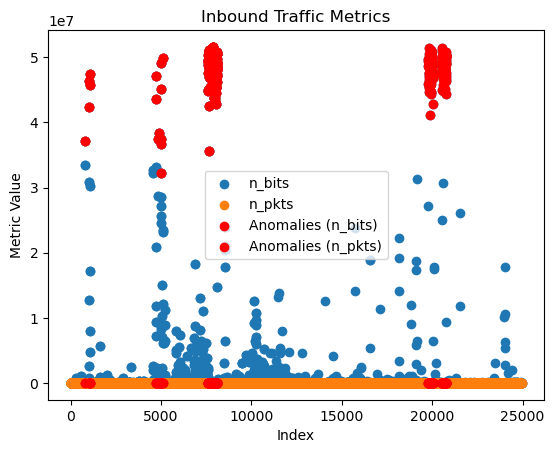

In [8]:

from scipy.stats import zscore

inbound_traffic = df1[df1['category'] == 'InboundTCPMetrics']

metrics = ['n_bits', 'n_pkts']

for metric in metrics:
    inbound_traffic[f'{metric}_zscore'] = zscore(inbound_traffic[metric])

threshold = 3  

anomalies = inbound_traffic[
    (np.abs(inbound_traffic[f'{metrics[0]}_zscore']) > threshold) |
    (np.abs(inbound_traffic[f'{metrics[1]}_zscore']) > threshold)
]

plt.scatter(inbound_traffic.index, inbound_traffic['n_bits'], label='n_bits')
plt.scatter(inbound_traffic.index, inbound_traffic['n_pkts'], label='n_pkts')
plt.scatter(anomalies.index, anomalies['n_bits'], color='r', label='Anomalies (n_bits)')
plt.scatter(anomalies.index, anomalies['n_pkts'], color='r', label='Anomalies (n_pkts)')
plt.xlabel('Index')
plt.ylabel('Metric Value')
plt.title('Inbound Traffic Metrics')
plt.legend()
plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

data = pd.read_csv('fileinbound2tcp.csv')

features = ['n_pkts', 'n_bits', 'n_drops', 'n_syn_pkts', 'n_ack_pkts', 'n_psh_pkts', 'n_rst_pkts', 'n_fin_pkts',
            'n_ece_pkts', 'n_urg_pkts', 'n_cwr_pkts', 'n_tcp_payload_misbehaviour_drops',
            'n_tcp_payload_misbehaviour_timeouts', 'n_out_of_order_drops', 'n_ssl_renegotiation_requests']

X = data[features]

k = 2  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

cluster_labels = kmeans.predict(X)

data['cluster_label'] = cluster_labels

ddos_data = data[data['cluster_label'] == 1]
print(ddos_data)

data['is_ddos'] = np.where(data['cluster_label'] == 1, True, False)
data.head()


                category      timestamp  n_pkts    n_bits  n_drops  \
810    InboundTCPMetrics  1685407571000    3431  37083096        0   
811    InboundTCPMetrics  1685407571000    3431  37083096        0   
813    InboundTCPMetrics  1685407581000    3095  33501760        0   
814    InboundTCPMetrics  1685407581000    3095  33501760        0   
1032   InboundTCPMetrics  1685408311000    2849  30799392        0   
...                  ...            ...     ...       ...      ...   
20775  InboundTCPMetrics  1685480655000    4530  48919840        0   
20778  InboundTCPMetrics  1685480665000    4646  50224392        0   
20781  InboundTCPMetrics  1685480675000    4619  49992920        0   
20784  InboundTCPMetrics  1685480685000    4390  47519656        0   
21526  InboundTCPMetrics  1685482715000    2419  26024344        0   

       n_syn_pkts  n_ack_pkts  n_psh_pkts  n_rst_pkts  n_fin_pkts  n_ece_pkts  \
810             6        3431         802           0           3           0 

/home/haltdos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,category,timestamp,n_pkts,n_bits,n_drops,n_syn_pkts,n_ack_pkts,n_psh_pkts,n_rst_pkts,n_fin_pkts,n_ece_pkts,n_urg_pkts,n_cwr_pkts,n_tcp_payload_misbehaviour_drops,n_tcp_payload_misbehaviour_timeouts,n_out_of_order_drops,n_ssl_renegotiation_requests,cluster_label,is_ddos
0,InboundTCPMetrics,1685404871000,3,9920,0,4,3,1,2,0,0,0,0,0,0,0,0,0,False
1,InboundTCPMetrics,1685404871000,3,9920,0,4,3,1,2,0,0,0,0,0,0,0,0,0,False
2,InboundTCPMetrics,1685404871000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
3,InboundTCPMetrics,1685404881000,3,3768,0,4,2,1,2,0,0,0,0,0,0,0,0,0,False
4,InboundTCPMetrics,1685404881000,3,3768,0,4,2,1,2,0,0,0,0,0,0,0,0,0,False


In [15]:
filtered_data = data[data['is_ddos'] == True]

In [16]:
filtered_data.head()

,category,timestamp,n_pkts,n_bits,n_drops,n_syn_pkts,n_ack_pkts,n_psh_pkts,n_rst_pkts,n_fin_pkts,n_ece_pkts,n_urg_pkts,n_cwr_pkts,n_tcp_payload_misbehaviour_drops,n_tcp_payload_misbehaviour_timeouts,n_out_of_order_drops,n_ssl_renegotiation_requests,cluster_label,is_ddos
810,InboundTCPMetrics,1685407571000,3431,37083096,0,6,3431,802,0,3,0,0,0,0,0,0,0,1,True
811,InboundTCPMetrics,1685407571000,3431,37083096,0,6,3431,802,0,3,0,0,0,0,0,0,0,1,True
813,InboundTCPMetrics,1685407581000,3095,33501760,0,2,3095,551,0,2,0,0,0,0,0,0,7,1,True
814,InboundTCPMetrics,1685407581000,3095,33501760,0,2,3095,551,0,2,0,0,0,0,0,0,7,1,True
1032,InboundTCPMetrics,1685408311000,2849,30799392,0,6,2848,546,3,3,0,0,0,0,0,0,0,1,True


In [17]:
filtered_data.shape

(578, 19)

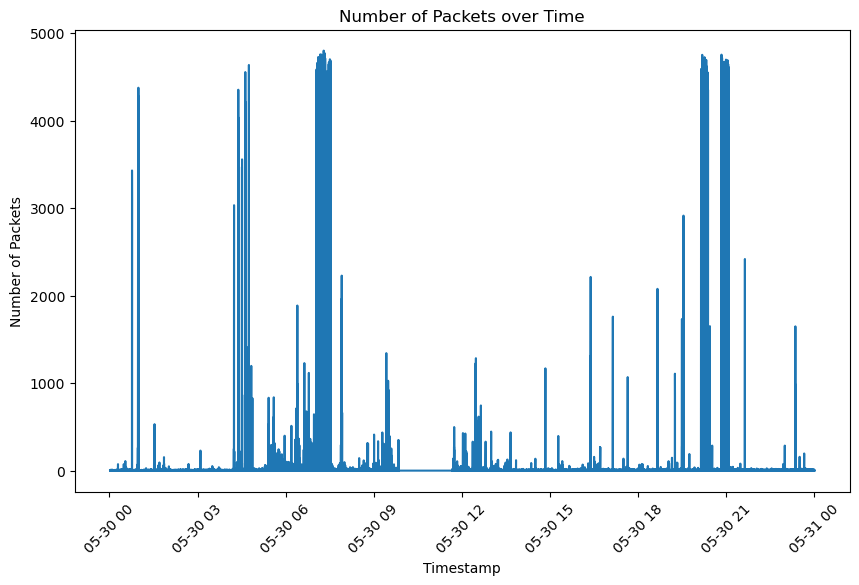

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_file = 'fileinbound2tcp.csv'

df = pd.read_csv(data_file)

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

df.set_index('timestamp', inplace=True)

 plt.figure(figsize=(10, 6))
plt.plot(df.index, df['n_pkts'])
plt.xlabel('Timestamp')
plt.ylabel('Number of Packets')
plt.title('Number of Packets over Time')
plt.xticks(rotation=45)
plt.show()


In [4]:
  import pandas as pd

data_file = 'fileinbound2tcp.csv'

df = pd.read_csv(data_file)

df['ack_syn_ratio'] = df['n_ack_pkts'] / df['n_syn_pkts']

mean_ratio = df['ack_syn_ratio'].mean()
std_ratio = df['ack_syn_ratio'].std()

abnormal_threshold = mean_ratio + (2 * std_ratio)

abnormal_values = df[df['ack_syn_ratio'] > abnormal_threshold]

print(abnormal_values)


Empty DataFrame
Columns: [category, timestamp, n_pkts, n_bits, n_drops, n_syn_pkts, n_ack_pkts, n_psh_pkts, n_rst_pkts, n_fin_pkts, n_ece_pkts, n_urg_pkts, n_cwr_pkts, n_tcp_payload_misbehaviour_drops, n_tcp_payload_misbehaviour_timeouts, n_out_of_order_drops, n_ssl_renegotiation_requests, ack_syn_ratio]
Index: []
